In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
#load dataset
df=pd.read_csv('C:/Users/vidya/OneDrive/Desktop/New folder/PROJECTS/DATASET/Churn_Modelling.csv')

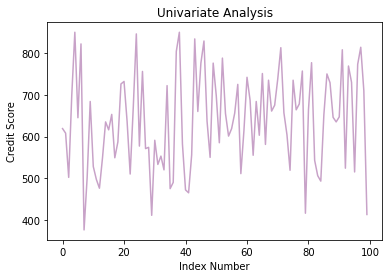

In [3]:
#perform univariate analysis
plt.title('Univariate Analysis')

plt.xlabel('Index Number')
plt.ylabel('Credit Score')

test=df[:100]
plt.plot(test.index,test.CreditScore,color='#C8A2C8')

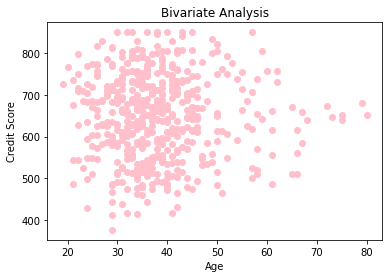

In [4]:
#perform bivariate analysis
plt.title('Bivariate Analysis')

demoData=df[:500]
plt.xlabel('Age')
plt.ylabel('Credit Score')

plt.scatter(demoData.Age,demoData.CreditScore,color=['pink'])

<AxesSubplot:title={'center':'Multivariate Analysis'}, xlabel='Age', ylabel='CreditScore'>

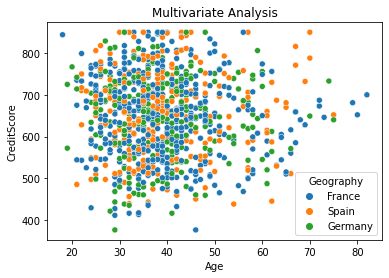

In [5]:
#perform multivatiate analysis
plt.title('Multivariate Analysis')

sns.scatterplot(data=df[:1000], x="Age", y="CreditScore", hue="Geography")

In [6]:
#descriptive statistics
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
#returns number of null values in each column
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
#there are no null values. In case NaN values exist in a particular column_name
#df['column_name']=df['column_name'].fillna(df['column_name'].mean())

<AxesSubplot:xlabel='CreditScore'>

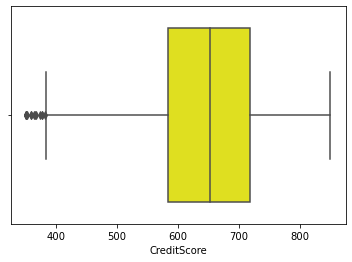

In [9]:
#identifying outliers by visualizing using boxplot (black circles are the outliers)
sns.boxplot(df['CreditScore'],data=df,color='yellow')

In [10]:
#replacing outliers
median=df['CreditScore'].median()
df['CreditScore'] = np.where(df['CreditScore']<400,median,df['CreditScore']) #all scores>400 are replaced with median score

<AxesSubplot:xlabel='CreditScore'>

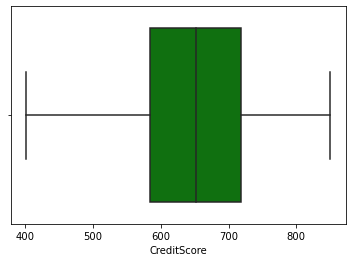

In [11]:
#after replacement of the outliers
sns.boxplot(df['CreditScore'],data=df,color='green')

In [12]:
#Check for Categorical columns
l=df.select_dtypes(include=['object']).columns.tolist() #form a list of all the categorical columns in df
print(l)

['Surname', 'Geography', 'Gender']


In [13]:
#perform encoding
pd.get_dummies(df, columns=l, prefix=['s_name', 'location', 'gender']).head(5) #encode all columns

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,s_name_Zubarev,s_name_Zubareva,s_name_Zuev,s_name_Zuyev,s_name_Zuyeva,location_France,location_Germany,location_Spain,gender_Female,gender_Male
0,1,15634602,619.0,42,2,0.00,1,1,1,101348.88,...,0,0,0,0,0,1,0,0,1,0
1,2,15647311,608.0,41,1,83807.86,1,0,1,112542.58,...,0,0,0,0,0,0,0,1,1,0
2,3,15619304,502.0,42,8,159660.80,3,1,0,113931.57,...,0,0,0,0,0,1,0,0,1,0
3,4,15701354,699.0,39,1,0.00,2,0,0,93826.63,...,0,0,0,0,0,1,0,0,1,0
4,5,15737888,850.0,43,2,125510.82,1,1,1,79084.10,...,0,0,0,0,0,0,0,1,1,0


In [29]:
#split the data into dependent and independent variables
independent_variable=df.iloc[:,3] #credit score is an independent variable
dependent_variable=df.iloc[:,7] #tenure is the dependent variable

In [31]:
#Scale the independent variables
independent_variable= (independent_variable-independent_variable.mean()) / independent_variable.std() # standardize data using Z Scores

In [33]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,-0.334547,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,-0.449299,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,-1.555092,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,0.500013,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,2.075247,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [16]:
#Split the data into training and testing
data=df.values
X, y = data[:,:-1], data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75) #75% of data is considered in train set and remaining in test set
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape) #returns no.of rows and columns in each

(7500, 13) (2500, 13) (7500,) (2500,)
